In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-sales-data/Laptops.csv
/kaggle/input/laptop-sales-data/AnalytixLabs - Laptops case study.pdf
/kaggle/input/laptop-sales-data/POS.csv
/kaggle/input/laptop-sales-data/Store_Locations.csv


# Laptop Sales Analysis (2015)
## Project Overview - This notebook explore the sales data of various laptop configurations sold across 15 different stores in London. The company wants to define the product strategy and pricing policies in order to maximize the revenue for the upcoming year. For which the company has made certain data available for analysis and turn into actionable insights.
## Table of Contents
1. ## Data Loading and Initial Inspection includes merging of datasets.
2. ## Understanding Laptop Configurations
3. ## Discovering Insights using data analysis tools.
4. ## Conclusions and Findings
5. ## Future Work

## Data Loading and Initial Inspection 
## First, let's load the necessary libraries and our datasets which we have in different csv files.
## POS data- Point of Sales Transactions for 2015
## Store data- Store's gepgraphical informations
## Laptop data- Laptops specifications details

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pos=pd.read_csv("/kaggle/input/laptop-sales-data/POS.csv")
laptop=pd.read_csv("/kaggle/input/laptop-sales-data/Laptops.csv")
store=pd.read_csv("/kaggle/input/laptop-sales-data/Store_Locations.csv")

# Let us look whether data import has been successful or not 

In [3]:
pos.head()
dimensions=pos.shape
dimensions
## Our data has 6 columns defining point of sale data such as Date, Configuration types, Customer's coordinates
## Store location (potsal codes) and retail prices with 297307 observations all ranging from 1st Jan 2015 
## till 31st December 2015 which means approximately 3 lakhs different configurations were sold 
## throughout the year 2015.

(297307, 6)

## Our data has 6 columns of defining point of sales data which defines important variables like Retail price, customer coordinates , Dates etc
## We have approximately 3 lakh observations which means total 3 Lakhs invoices for this year were generated by the company

## We also do not have any categorical variables across our data

In [4]:
pos['Configuration'].info

<bound method Series.info of 0         163
1         320
2          23
3         169
4         365
         ... 
297302    703
297303    731
297304    375
297305    101
297306    343
Name: Configuration, Length: 297307, dtype: int64>

## 864 different configurations of laptops were sold this year.

## Merge all 3 data sets in order for further data analysis.
## We have connecting columns in each file if we look closely that would help in joining datasets.

In [5]:
pos_lap=pos.merge(laptop,on='Configuration',how='left')

In [6]:
final_lap=pos_lap.merge(store,on="Store Postcode",how='left')
final_lap.head()
final_lap.shape

(297307, 13)

## We have now merged all datasets, and to check consistency, we have same number of observations, which means we have not lost any data during our pre-processing stage. 

In [7]:
## Let us drop duplicates and find out unique configurations that our final data has
final_lap.drop_duplicates(subset=['Configuration']).shape[0]
## Q1 - What were Top 20 configurations sold in the year 2015 ?
final_lap.head()
final_lap['Date']=pd.to_datetime(final_lap['Date'],format='%d-%b-%y')
## Transform the date column to extract data, month or Year as our further analysis may demand.
final_lap.head()
final_lap.shape

(297307, 13)

## Dropping duplicates
## Convert 'date' column to datetime

## Q1- Which were Top 20 configurations of laptops sold in year 2015 ?

In [8]:
top_20_config=final_lap.groupby('Configuration').size().nlargest(20).reset_index(name='count')
top_20_config


,Configuration,count
0,61,825
1,316,823
2,72,820
3,345,817
4,353,817
5,207,812
6,53,810
7,15,804
8,340,803
9,296,796


<function matplotlib.pyplot.show(close=None, block=None)>

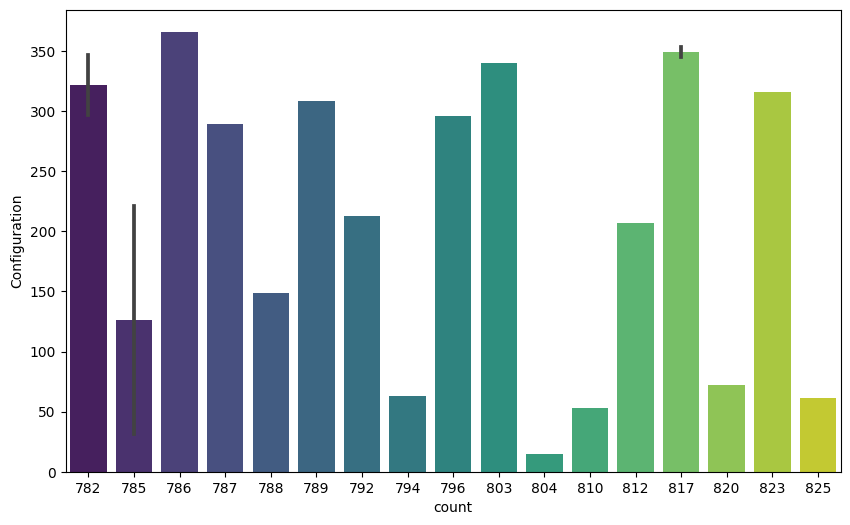

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_20_config['count'],y=top_20_config['Configuration'],palette='viridis')
plt.show

# Insight- Identify high demand products to priortize inventory.

## Q2- For these top 20 configurations, has the average price varied over time ? 

In [10]:
t20=top_20_config['Configuration']
final_lap['Month']=final_lap['Date'].dt.month
laptop_20=final_lap[final_lap['Configuration'].isin (t20)]

In [11]:
## Solution to Q2 code
average_price_variation=laptop_20.groupby(['Configuration','Month'])['Retail Price'].mean().unstack(level=0)

In [12]:
## Now we see that the average prices of these Top 20 laptops varies over the these 12 months for sure
average_price_variation

Configuration,15,31,53,61,63,72,149,207,213,221,289,296,297,308,316,340,345,347,353,366
Month,,,,,,,,,,,,,,,,,,,,
1,470.000000,495.000000,480.000000,460.000000,520.000000,515.000000,450.000000,540.000000,525.000000,505.000000,470.000000,540.000000,450.000000,485.000000,465.000000,510.000000,500.000000,540.000000,545.000000,535.000000
2,465.000000,490.000000,470.000000,450.000000,510.000000,505.000000,445.000000,530.000000,515.000000,495.000000,465.000000,535.000000,445.000000,480.000000,460.000000,500.000000,490.000000,530.000000,535.000000,525.000000
3,413.292308,447.370690,422.117647,394.166667,469.491525,448.212329,394.240000,479.741935,469.542553,440.610169,412.562500,495.218750,394.307692,427.500000,422.770833,450.661972,435.529412,470.080000,487.627119,482.604839
4,455.000000,480.000000,450.000000,430.000000,490.000000,485.000000,435.000000,510.000000,495.000000,475.000000,455.000000,525.000000,435.000000,470.000000,450.000000,480.000000,470.000000,510.000000,515.000000,505.000000
5,450.000000,475.000000,440.000000,420.000000,480.000000,475.000000,430.000000,500.000000,485.000000,465.000000,450.000000,520.000000,430.000000,465.000000,445.000000,470.000000,460.000000,500.000000,505.000000,495.000000
6,409.983607,431.103448,397.750000,373.259740,418.161765,413.850000,383.807692,448.656250,429.875000,404.444444,409.400000,461.354167,391.815068,417.108108,389.714286,422.000000,416.769231,464.333333,462.330000,434.984375
7,440.000000,465.000000,420.000000,400.000000,460.000000,455.000000,420.000000,480.000000,465.000000,445.000000,440.000000,510.000000,420.000000,455.000000,435.000000,450.000000,440.000000,480.000000,485.000000,475.000000
8,435.000000,460.000000,410.000000,390.000000,450.000000,445.000000,415.000000,470.000000,455.000000,435.000000,435.000000,505.000000,415.000000,450.000000,430.000000,440.000000,430.000000,470.000000,475.000000,465.000000
9,394.818182,413.456522,367.906977,348.500000,411.304348,404.493506,381.058824,416.771084,409.274648,390.746269,385.821918,469.277108,379.671233,410.035714,400.208333,397.750000,379.826087,419.307692,428.949438,409.500000


<Figure size 1000x400 with 0 Axes>

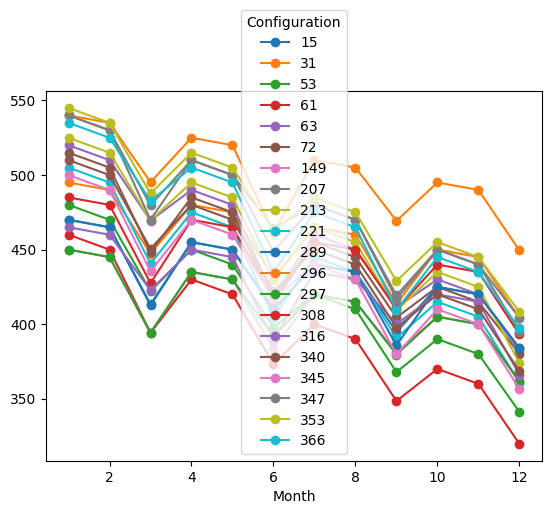

In [13]:
plt.figure(figsize=(10,4))
average_price_variation.plot(marker='o')
plt.show()

# Key Insight- Detect seasonal pricing patterns or discounts. In fact it is visible that retail prices are dropped (or discounted) after first 6 months to boost sales. 

## Q3- Are average prices of these top 20 laptop configurations consistent across stores ? 

In [14]:
## We would need the similar data that we worked with in Q2 but this time for the store locations.
store_variations=laptop_20.groupby(['Configuration','Store Postcode'])['Retail Price'].mean().unstack(level=0)

In [15]:
store_variations

Configuration,15,31,53,61,63,72,149,207,213,221,289,296,297,308,316,340,345,347,353,366
Store Postcode,,,,,,,,,,,,,,,,,,,,
CR7 8LE,386.823529,386.205882,391.333333,341.684211,415.500000,398.950000,370.886364,446.320000,407.526316,378.615385,386.240741,460.442308,403.636364,407.500000,363.343750,405.692308,393.285714,438.900000,417.947368,426.928571
E2 0RY,442.826087,463.494624,421.000000,400.229885,456.103896,448.157895,424.137931,475.421687,460.000000,437.676056,441.986301,509.756098,425.189873,457.733333,438.900000,452.692308,441.250000,478.513514,488.733333,478.076923
E7 8NW,375.100000,417.333333,437.333333,353.473684,431.909091,407.636364,357.636364,371.636364,412.850000,373.208333,410.250000,427.150000,380.789474,400.964286,405.150000,403.500000,410.400000,417.785714,483.642857,447.100000
KT2 5AU,435.666667,470.000000,435.384615,393.636364,458.000000,443.666667,424.642857,480.769231,480.454545,452.142857,437.058824,513.750000,419.705882,457.000000,445.000000,450.000000,449.230769,484.285714,495.769231,467.222222
N17 6QA,434.444444,470.000000,422.500000,375.000000,457.142857,463.571429,417.500000,485.000000,470.000000,454.000000,437.000000,496.875000,419.666667,469.090909,436.153846,450.833333,461.111111,488.666667,509.000000,500.555556
N3 1DH,294.000000,470.833333,404.900000,320.142857,370.800000,428.083333,398.444444,436.875000,345.666667,429.750000,380.500000,459.285714,367.000000,417.000000,391.500000,339.285714,405.888889,458.000000,460.062500,337.600000
NW5 2QH,440.459770,465.705882,421.250000,403.296703,455.301205,452.526882,420.138889,485.287356,465.750000,447.839506,440.974026,513.089888,421.280488,457.083333,434.175824,452.254902,443.125000,480.875000,485.000000,481.888889
SE1 2BN,439.829060,467.110092,416.299213,403.925234,465.413534,461.014493,421.166667,483.282443,467.320000,443.496241,439.636364,508.347826,420.000000,455.518868,435.284553,452.822581,439.075630,486.890756,483.181818,475.423729
SE8 3JD,445.441176,461.046512,432.962963,409.148936,466.250000,461.829268,424.756098,481.162791,471.315789,444.714286,440.454545,516.500000,422.884615,452.777778,435.232558,453.111111,447.254902,480.588235,487.580645,470.714286


<function matplotlib.pyplot.show(close=None, block=None)>

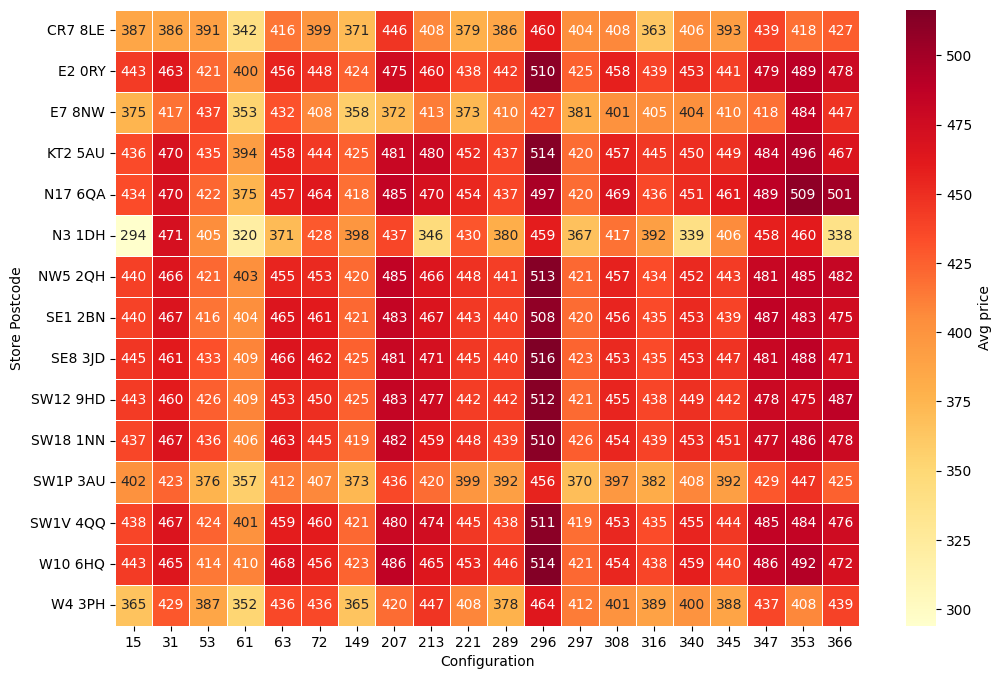

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(store_variations,annot=True,fmt=".0f",cmap="YlOrRd",linewidths=0.5,cbar_kws={'label':'Avg price'})
plt.show

## Insight-Compare average prices across diferent store locations, this can be used to identify outliers i.e (stores selling at unusually high or low prices)

## The average prices for these Top 20 laptops are not at all consistent across the store locations.

## Q3- Does Latop sales vary by month OR by the day ?? It wants us to identify trends and seasonality in sales data month wise and day wise.

In [17]:
final_lap['Day']=final_lap['Date'].dt.day
monthly_sale=final_lap.groupby('Month').size()
daily_sale=final_lap.groupby('Day').size()
print(monthly_sale,daily_sale)


Month
1      7960
2      7292
3      7845
4      7635
5      8071
6     32750
7     34040
8     37680
9     39565
10    33943
11    32852
12    47674
dtype: int64 Day
1     10012
2      9911
3     10310
4     10259
5      9971
6     10147
7      8994
8      9151
9      9028
10     8823
11     8940
12     8940
13     9823
14     9569
15     9789
16     9955
17     9664
18     9761
19     9737
20     9999
21     9692
22     9798
23     9811
24     9741
25     9649
26    10006
27     9788
28     9760
29    10537
30    10593
31     5149
dtype: int64


<Axes: xlabel='Month'>

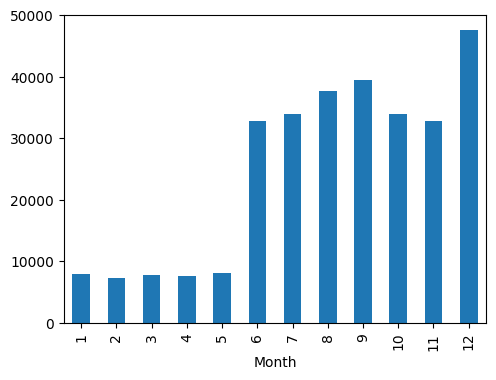

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
monthly_sale.plot(kind='bar')

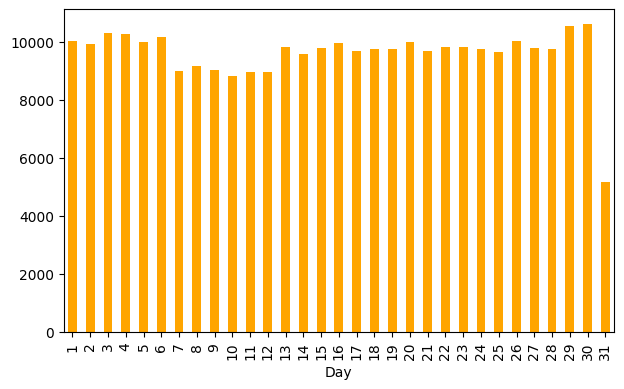

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
daily_sale.plot(kind='bar',color='orange')
plt.tight_layout()

# Insights- Company can plan promotions around Peak period basis this data

## Interpretation-Most of the variation happens in second half of the year, rather than daily sales has an average of 9-10k, which is usually flat if we compare daily sales.

# Q5- Do stores with low average prices sell more ?

In [20]:
store_wise_sales=final_lap.groupby('Store Postcode').agg(
    avg_prices=('Retail Price','mean'),
    store_data=('Configuration','count')
)

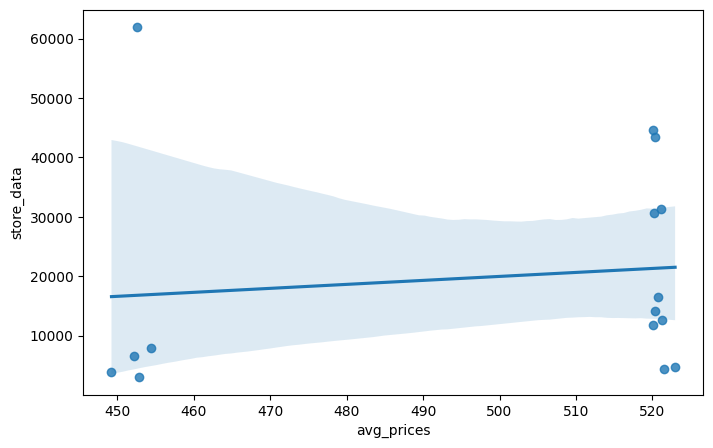

In [21]:
plt.figure(figsize=(8,5))
sns.regplot(x='avg_prices',y='store_data',data=store_wise_sales)
plt.show()

## Insights- Validate pricing strategy effectiveness,Stores with high average prices sell more.

## Q6- On average how far do customers travel to buy Laptops ? Also calculate the average distance travelled at an overall level for each store ? 

In [22]:
final_lap.columns
final_lap['avg_dist']=np.sqrt((final_lap['C OSx']-final_lap['St OS X'])**2+
         (final_lap['C OSy']-final_lap['St OS Y'])**2)

In [23]:
overall_avg=final_lap['avg_dist'].mean()
store_avg=final_lap.groupby('Store Postcode')['avg_dist'].mean()
print(overall_avg,store_avg)


3680.9822927890577 Store Postcode
CR7 8LE     3030.646410
E2 0RY      3798.877483
E7 8NW      2919.483844
KT2 5AU     3616.008453
N17 6QA     5317.531773
N3 1DH      5375.425681
NW5 2QH     3529.041735
SE1 2BN     3152.295179
SE8 3JD     5197.668740
SW12 9HD    5299.355535
SW18 1NN    6648.893660
SW1P 3AU    2727.837253
SW1V 4QQ    3118.393042
W10 6HQ     4208.007666
W4 3PH      5216.850836
Name: avg_dist, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


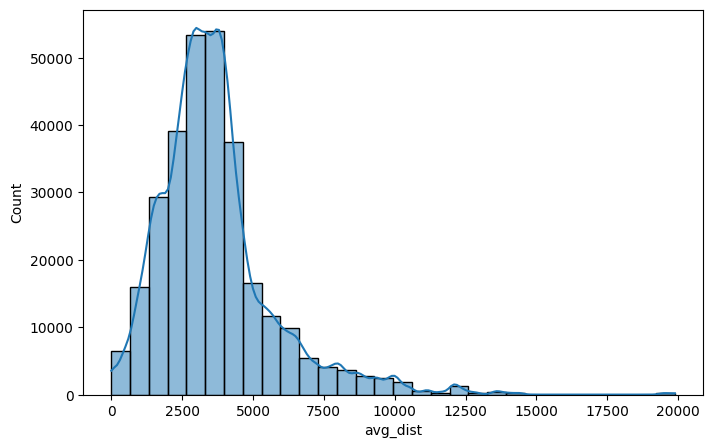

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(final_lap['avg_dist'],bins=30,kde=True)
plt.show()

## Q5. Does proximity help in increasing sales of the store ?

In [25]:
store_sales=final_lap.groupby('Store Postcode').size()
proximity_sale=pd.DataFrame({'distance':store_avg,'sales':store_sales})
print(proximity_sale)
relation=proximity_sale['distance'].corr(proximity_sale['sales'])
print(relation)

                   distance  sales
Store Postcode                    
CR7 8LE         3030.646410   7831
E2 0RY          3798.877483  30682
E7 8NW          2919.483844   3793
KT2 5AU         3616.008453   4336
N17 6QA         5317.531773   4734
N3 1DH          5375.425681   3009
NW5 2QH         3529.041735  31382
SE1 2BN         3152.295179  44606
SE8 3JD         5197.668740  16572
SW12 9HD        5299.355535  12676
SW18 1NN        6648.893660  14066
SW1P 3AU        2727.837253  61924
SW1V 4QQ        3118.393042  43440
W10 6HQ         4208.007666  11719
W4 3PH          5216.850836   6537
-0.5109938270990523


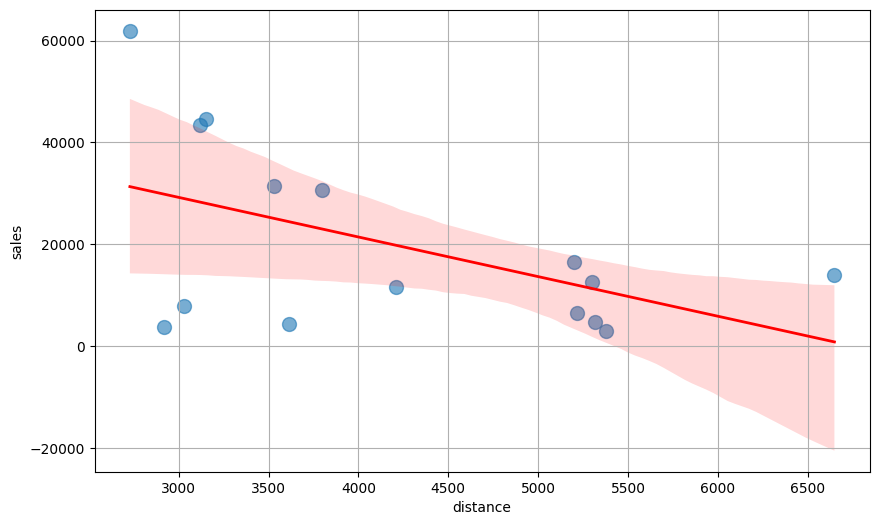

In [28]:
plt.figure(figsize=(10,6))
sns.regplot(x='distance',y='sales',data=proximity_sale,
           scatter_kws={'s':100,'alpha':0.6},
           line_kws={'color':'red','lw':2})
plt.grid(True)

## Interpretation- Proximity to the store boosts Sales. Also when we looked at the correlation between the two , a value of -0.51 suggests proximity=Higher sales.

## Conclusion and Key findings-
  This analysis of laptop sales data reveals several key insights:
  *** Diverse & several unique laptop configurations were sold by the company, ranging up to 864 catering to various user needs.
  ***  Pricing strategy, most of the sales were concentrated in mid range price segments indicating a mass market focus.
  *** Few Stores which showed up the higest recorded sales like SWIP -3AU, 4OQ and SE1 2BN due to their below or almost near to average proximity to customer locations .
  *** Laptops with certain configurations were quite popular than others as per our findings above.